<a href="https://colab.research.google.com/github/mohammad0alfares/Credit-Card-Fraud-Detection/blob/master/CreditCardFraudDetection_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About The data set

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. **Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.**

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. 

# Import Data from Drive

Please download the data from https://www.kaggle.com/mlg-ulb/creditcardfraud

Info about data: it is a CSV file, contains 31 features, the last feature is used to classify the transaction whether it is a fraud or not



In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import os 


In [ ]:
os.chdir("/content/drive/My Drive/CreditCard")

In [ ]:
cwd = os.getcwd()
print (cwd)
!ls -lah

/content/drive/My Drive/CreditCard
total 144M
-rw------- 1 root root 144M Feb 29 08:20 creditcard.csv


In [ ]:
!wc -l creditcard.csv


284808 creditcard.csv


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

url = "/content/drive/My Drive/CreditCard/creditcard.csv"

creditcard = pd.read_csv(url)

creditcard.head()


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Developing a PCA with our partner

Whenevr we select our partner , and see the dimentions of data they have , we could use this approach to develop a good PCA for 

1.   Dimensionality Reduction
2.   Featuers Encoding



The pipeline will be evaluated using repeated stratified cross-validation with three repeats and 10 folds per repeat. Performance is presented as the mean classification accuracy.

In [1]:
## import from github
!rm -rf ./MachineLearning
!git clone https://github.com/mkjubran/MachineLearning.git

Cloning into 'MachineLearning'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 257 (delta 1), reused 6 (delta 1), pack-reused 250
Receiving objects: 100% (257/257), 72.83 MiB | 25.38 MiB/s, done.
Resolving deltas: 100% (116/116), done.


In [2]:
# ignore all future warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [3]:
# import data 
import pandas as pd
HR = pd.read_csv('./MachineLearning/2_logistic/HR_comma_sep.csv')
HR.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
# apply one hot encoding for the categorical features (salary) 
dm = pd.get_dummies(HR.salary)
HR_GF_merged = pd.concat([HR,dm],axis=1)
HR_GF_merged = HR_GF_merged.drop(['salary','medium'],axis=1)
HR_GF_merged = HR_GF_merged.drop(['Department'],axis=1)
HR_GF_merged.head()



,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,high,low
0,0.38,0.53,2,157,3,0,1,0,0,1
1,0.80,0.86,5,262,6,0,1,0,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1
4,0.37,0.52,2,159,3,0,1,0,0,1


In [5]:
x = HR_GF_merged.drop('left',axis=1)
y = HR_GF_merged.left

In [ ]:
x.shape

(14999, 9)

>1 0.762 (0.000)
>2 0.768 (0.005)
>3 0.773 (0.007)
>4 0.773 (0.007)
>5 0.773 (0.006)
>6 0.771 (0.007)
>7 0.770 (0.007)
>8 0.768 (0.008)
>9 0.788 (0.007)


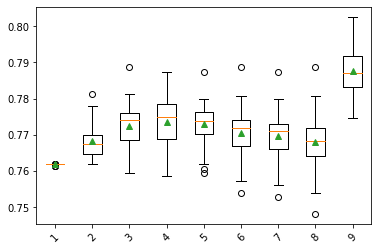

In [ ]:
# compare pca number of components with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
 
# get the dataset
def get_dataset():
    X = HR_GF_merged.drop('left',axis=1)
    y = HR_GF_merged.left
    ## X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=7)
    ## Data here depend on our partner system and feilds they have
    return X,y
 
# get a list of models to evaluate
def get_models(dx):
	n_featuers = dx.shape[1] + 1
	models = dict()
	for i in range(1,n_featuers):
		steps = [('scale', StandardScaler()), ('pca', PCA(n_components=i)), ('m', LogisticRegression())]
		models[str(i)] = Pipeline(steps=steps)
	return models
 
# evaluate a given model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models(X)
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xticks(rotation=45)
pyplot.show()

In [ ]:
from sklearn.decomposition import PCA
X = HR_GF_merged.drop('left',axis=1)
y = HR_GF_merged.left

pca = PCA(n_components=9)
principalComponents = pca.fit_transform(X)
## fit then transform ( to keep the model for prediction transfomation )
feat_cols = ['V'+str(i+1) for i in range(principalComponents.shape[1])]
principalDf = pd.DataFrame(data = principalComponents, columns= feat_cols)
principalDf

finalDf = pd.concat([principalDf, y], axis = 1)
finalDf

,V1,V2,V3,V4,V5,V6,V7,V8,V9,left
0,-44.068284,-0.693580,1.198803,-0.528518,-0.162921,0.001922,0.267210,0.040933,-0.006774,1
1,60.967814,2.345007,0.079979,0.425182,-0.131498,-0.168474,-0.258448,0.000223,-0.042169,1
2,70.980424,0.917171,-2.317960,0.447848,-0.179813,-0.214749,0.392906,-0.067905,-0.004526,1
3,21.966453,1.620742,-0.551044,-0.536236,-0.122887,0.044629,-0.195844,-0.053117,-0.010388,1
4,-42.068416,-0.706361,1.216685,-0.528794,-0.163649,0.000984,0.279561,0.050448,-0.007671,1
...,...,...,...,...,...,...,...,...,...,...
14994,-50.067874,-0.654870,1.144580,-0.528056,-0.161497,0.003747,0.238148,0.000914,-0.002548,1
14995,-41.068523,-0.713397,1.226846,-0.528665,-0.163721,0.001076,0.287034,0.090252,-0.012329,1
14996,-58.067432,-0.603473,1.073673,-0.529098,-0.164342,0.000914,0.271145,0.029087,-0.005428,1
14997,78.969719,0.579865,-1.295757,-0.533209,-0.165371,-0.004118,0.395844,-0.172810,0.024315,1


Later , our partner would use the same input feilds (featuers ) and the number of componenets to generate a PCA data, then call our API 

# How to Deal with Imbalanced Dataset

In [ ]:
print(creditcard.shape)

(284807, 31)


In [ ]:
print(creditcard.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [ ]:
## check null values 
print (f'Number if the records = {creditcard.shape[0]}')
pd.isnull(creditcard).sum()

Number if the records = 284807


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
creditcard["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
## the data is highly unbalanced
positive =  creditcard[creditcard.Class == 1]
positive_cnt = positive.shape[0]

negative =  creditcard[creditcard.Class == 0]
negative_cnt = negative.shape[0]

fruad_pct= positive_cnt / (positive_cnt  + negative_cnt )
print(f'records count = {creditcard.shape[0]} , fruad records = {positive_cnt} ,  the positive class (frauds) {round(fruad_pct*100,3)}%')


records count = 284807 , fruad records = 492 ,  the positive class (frauds) 0.173%


Observations:

We will use the Credit Card Fraud Detection Dataset available on Kaggle. The dataset is high imbalanced, with only 0.17% of transactions being classified as fraudulent.

**Imbalanced Classes**

Most machine learning algorithms work best when the number of samples in each class are about equal. This is because most algorithms are designed to maximize accuracy and reduce error.


https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18


We explored 5 different methods for dealing with imbalanced datasets:
Change the performance metric


1.   Change the performance metric
2.   Change the algorithm
3.   Oversample minority class
4.   Undersample majority class
5.   Generate synthetic samples




In [ ]:
from sklearn.model_selection import train_test_split
x = creditcard.drop( ['Class','Time'],axis=1)
y = creditcard.Class
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
print('size of test dataset = {}, size of traing data = {}, percentage = {}%'.format(len(x_test),len(x_train),len(x_test)*100/(len(x_test) + len(x_train))))

size of test dataset = 56962, size of traing data = 227845, percentage = 20.000210668979342%


In [ ]:
# Modeling the data as is
# Train model
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(solver='liblinear').fit(x_train, y_train)
 
# Checking accuracy
acc_model_lr = model_lr.score(x_train, y_train)
acc_test_lr = model_lr.score(x_test, y_test)

print(acc_model_lr*100)
print(acc_test_lr*100)

# Predict on training set
lr_pred = model_lr.predict(x_test)


99.92451008360948
99.89466661985183


high score !
but Let’s see what happens when we apply these F1 and recall scores to our logistic regression from above.

**1-Change the performance metric**

**To be reminded**

 Classifying a single point can result in 
 

1.   a true positive (truth = 1, guess = 1)
2.   a true negative (truth = 0, guess = 0)
1.   a false positive (truth = 0, guess = 1) 
2.   a false negative (truth = 1, guess = 0)

TP            FP

FN            TN


1) Accuracy measures how many classifications your algorithm got correct out of every classification it made.
**CA =(TP+TN)/ (TP+TN+ FP+FN)**

2) Precision measures : actually positive TP divided by total number of points predicted by model as positive
. **P = TP/(TP+FP)**

3) Recall measures : actually are positive TP divided by total number of positive points
**R =TP/(TP+FN)**

4) Precision and recall are tied to each other. As one goes up, the other will go down.

5) F1 score is a combination of precision and recall, **F1** score will be low if either precision or recall is low.

**which error we have to reduce depends on problem, requirements**

**Minimizing False Positive:** high Precision

Minimizing genuine trans but model detects fraud/Positive

if we don't want to interupt transaction by mistake 

**Minimizing False Negative:** high recall

Minimizing fraud trans but model detects genuine/Negative

if we don't want credit-card holder to loss money


In [ ]:
# 1-Change the performance metric
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score


In [ ]:
acc_test_lr= accuracy_score(y_test, lr_pred)*100
acc_pr_lr= precision_score(y_test, lr_pred, average='micro')*100
acc_recall_lr= recall_score(y_test, lr_pred)*100
acc_f1_lr= f1_score(y_test, lr_pred)*100

print('accuracy_score= ', acc_test_lr)
print('pr_score= ', acc_pr_lr)
print('recall_score= ', acc_recall_lr)
print('f1_score= ',acc_f1_lr)

accuracy_score=  99.89466661985183
pr_score=  99.89466661985183
recall_score=  53.57142857142857
f1_score=  66.66666666666667


These scores don’t look quite so impressive

**2. Change the algorithm**

Decision trees frequently perform well on imbalanced data. They work by learning a hierarchy of if/else questions and this can force both classes to be addressed

In [ ]:
# 2. Change the algorithm
from sklearn.ensemble import RandomForestClassifier

# train model
model_rfc = RandomForestClassifier(n_estimators=10).fit(x_train, y_train)

# predict on test set
rfc_pred = model_rfc.predict(x_test)


In [ ]:
acc_test_rfc= accuracy_score(y_test, rfc_pred)*100
acc_pr_rfc= precision_score(y_test, rfc_pred, average='micro')*100
acc_recall_rfc= recall_score(y_test, rfc_pred)*100
acc_f1_rfc= f1_score(y_test, rfc_pred)*100


print('accuracy_score= ', acc_test_rfc)
print('pr_score= ', acc_pr_rfc)
print('recall_score= ', acc_recall_rfc)
print('f1_score= ', acc_f1_rfc)

accuracy_score=  99.9403110845827
pr_score=  99.9403110845827
recall_score=  75.89285714285714
f1_score=  83.33333333333331


While our accuracy score is slightly lower, both F1 and recall have increased as compared to logistic regression! It appears that for this specific problem, random forest may be a better choice of model.

In [ ]:
del x,y,x_train, x_test, y_train, y_test

**3. Resampling Techniques — Oversample minority class**

we would split into test and train sets BEFORE trying oversampling techniques.

In [ ]:
from sklearn.utils import resample

# Separate input features and target
y = creditcard.Class
X = creditcard.drop(['Class','Time'], axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

# upsample minority
fraud_upsampled = resample(fraud,
                          replace=True, # sample with replacement
                          n_samples=len(not_fraud), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([not_fraud, fraud_upsampled])

# check new class counts
upsampled.Class.value_counts()


1    213245
0    213245
Name: Class, dtype: int64

In [ ]:
# trying logistic regression again with the balanced dataset
y_train = upsampled.Class
X_train = upsampled.drop('Class', axis=1)

upsampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)
upsampled_pred = upsampled.predict(X_test)
   

In [ ]:
acc_test_ups= accuracy_score(y_test, upsampled_pred)*100
acc_pr_ups = precision_score(y_test, upsampled_pred, average='micro')*100
acc_recall_ups= recall_score(y_test, upsampled_pred)*100
acc_f1_ups= f1_score(y_test, upsampled_pred)*100

print('accuracy_score= ', acc_test_ups)
print('pr_score= ', acc_pr_ups)
print('recall_score= ', acc_recall_ups)
print('f1_score= ', acc_f1_ups)

accuracy_score=  97.78236566388586
pr_score=  97.78236566388586
recall_score=  87.87878787878788
f1_score=  12.810601877415792


Our recall score increased, but F1 is much lower than with either our baseline logistic regression or random forest from above. Let’s see if undersampling might perform better here.

In [ ]:
del X,y,X_train, X_test, y_train, y_test

**4. Resampling techniques — Undersample majority class**

Again, we would split into test and train sets BEFORE trying Undersample techniques.

In [ ]:
from sklearn.utils import resample

# Separate input features and target
y = creditcard.Class
X = creditcard.drop(['Class','Time'], axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
not_fraud = X[X.Class==0]
fraud = X[X.Class==1]

# downsample majority
not_fraud_downsampled = resample(not_fraud,
                                replace = False, # sample without replacement
                                n_samples = len(fraud), # match minority n
                                random_state = 27) # reproducible results

# combine minority and downsampled majority
downsampled = pd.concat([not_fraud_downsampled, fraud])

# checking counts
downsampled.Class.value_counts()


1    360
0    360
Name: Class, dtype: int64

In [ ]:
# trying logistic regression again with the undersampled dataset

y_train = downsampled.Class
X_train = downsampled.drop('Class', axis=1)

undersampled = LogisticRegression(solver='liblinear').fit(X_train, y_train)

undersampled_pred = undersampled.predict(X_test)


In [ ]:
acc_test_undr= accuracy_score(y_test, undersampled_pred)*100
acc_pr_undr = precision_score(y_test, undersampled_pred, average='micro')*100
acc_recall_undr= recall_score(y_test, undersampled_pred)*100
acc_f1_undr= f1_score(y_test, undersampled_pred)*100


print('accuracy_score= ', acc_test_undr)
print('pr_score= ',acc_pr_undr )
print('recall_score= ', acc_recall_undr)
print('f1_score= ', acc_f1_undr)

accuracy_score=  96.37791073284458
pr_score=  96.37791073284458
recall_score=  88.63636363636364
f1_score=  8.318521151795236


In [ ]:
del X,y,X_train, X_test, y_train, y_test

Undersampling underperformed oversampling in this case. Let’s try one more method for handling imbalanced data.

**5. Generate synthetic samples SMOTE**

Again, it’s important to generate the new samples only in the training set to ensure our model generalizes well to unseen data.

In [ ]:
from imblearn.over_sampling import SMOTE

# Separate input features and target
y = creditcard.Class
X = creditcard.drop('Class', axis=1)

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

sm = SMOTE(random_state=27, ratio=1.0)
X_train, y_train = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
smote = LogisticRegression(solver='liblinear').fit(X_train, y_train)

smote_pred = smote.predict(X_test)


In [ ]:
acc_test_smote= accuracy_score(y_test, smote_pred)*100
acc_pr_smote = precision_score(y_test, smote_pred, average='micro')*100
acc_recall_smote= recall_score(y_test, smote_pred)*100
acc_f1_smote= f1_score(y_test, smote_pred)*100


print('accuracy_score= ', acc_test_smote)
print('pr_score= ', acc_pr_smote)
print('recall_score= ', acc_recall_smote)
print('f1_score= ', acc_f1_smote)

accuracy_score=  98.58571388444145
pr_score=  98.58571388444145
recall_score=  86.36363636363636
f1_score=  18.461538461538463


In [ ]:
from prettytable import PrettyTable
t2 = PrettyTable(['Accuracy'  ,'Logistic'     ,'RF'              ,'Oversample'         ,'Undersample'   ,'SMOTE' ])
t2.add_row(['accuracy_score'  ,acc_test_lr    , acc_test_rfc     ,acc_test_ups         ,acc_test_undr   ,acc_test_smote])
t2.add_row(['pr_score'        ,acc_pr_lr      , acc_pr_rfc       ,acc_pr_ups           ,acc_pr_undr     ,acc_pr_smote])
t2.add_row(['recall_score'    ,acc_recall_lr  , acc_recall_rfc   ,acc_recall_ups       ,acc_recall_undr ,acc_recall_smote])
t2.add_row(['f1_score'        ,acc_f1_lr      , acc_f1_rfc       ,acc_f1_ups           ,acc_f1_undr     ,acc_f1_smote])
print(t2)



+----------------+-------------------+-------------------+--------------------+-------------------+--------------------+
|    Accuracy    |      Logistic     |         RF        |     Oversample     |    Undersample    |       SMOTE        |
+----------------+-------------------+-------------------+--------------------+-------------------+--------------------+
| accuracy_score | 99.89466661985183 |  99.9403110845827 | 97.78236566388586  | 96.37791073284458 | 98.58571388444145  |
|    pr_score    | 99.89466661985183 |  99.9403110845827 | 97.78236566388586  | 96.37791073284458 | 98.58571388444145  |
|  recall_score  | 53.57142857142857 | 75.89285714285714 | 87.87878787878788  | 88.63636363636364 | 86.36363636363636  |
|    f1_score    | 66.66666666666667 | 83.33333333333331 | 12.810601877415792 | 8.318521151795236 | 18.461538461538463 |
+----------------+-------------------+-------------------+--------------------+-------------------+--------------------+


It appears for this particular dataset random forest and SMOTE are the best of the options we tried here.

in our case we are looking to minimize false negative (minimize loses), so we are looking for high recall score , Undersample in this case results in a very samall quantity of data to train the model on, while Oversample increased the recall score, so we would consider Oversample approach.

# Execlde some Features

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
col='V28'
## V13 V20 V23 V28 seems irrelevant 

sns.distplot(creditcard[col][creditcard.Class == 1], bins=50, color='r')
sns.distplot(creditcard[col][creditcard.Class == 0], bins=50, color='g')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x = creditcard.drop(['Class','Time'],axis=1)
y = creditcard.Class
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [ ]:
## logistic regression after removing some featuers
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)
ACC_train_lr = model_lr.score(x_train, y_train)
ACC_test_lr = model_lr.score(x_test, y_test)

x_train2=x_train.drop(['V13','V20','V23','V28'],axis=1)
x_test2=x_test.drop(['V13','V20','V23','V28'],axis=1)


from sklearn.linear_model import LogisticRegression
model_lr2 = LogisticRegression()
model_lr2.fit(x_train2, y_train)
ACC_train_lr2 = model_lr2.score(x_train2, y_train)
ACC_test_lr2 = model_lr2.score(x_test2, y_test)


In [ ]:
## accuracy
lr_pred = model_lr.predict(x_test)
lr_pred2 = model_lr2.predict(x_test2)

from sklearn.metrics import accuracy_score
lr_accuracy_score=  accuracy_score(y_test, lr_pred)
lr_accuracy_score2=  accuracy_score(y_test, lr_pred2)

from sklearn.metrics import f1_score
lr_f1_score= f1_score(y_test, lr_pred)
lr_f1_score2= f1_score(y_test, lr_pred2)

from sklearn.metrics import recall_score
lr_recall_score= recall_score(y_test, lr_pred)
lr_recall_score2= recall_score(y_test, lr_pred2)

from prettytable import PrettyTable
t2 = PrettyTable(['Accuracy', 'Logistic (%)' , 'Logistic v2 (%)' ])
t2.add_row(['accuracy_score', lr_accuracy_score*100, lr_accuracy_score2*100])
t2.add_row(['f1_score',       lr_f1_score*100      , lr_f1_score2*100      ])
t2.add_row(['recall_score',   lr_recall_score*100  , lr_recall_score2*100  ])
print(t2)


Observations:

Execluding irrelevant featuers ('V13','V20','V23','V28') shows minor enhancemnt in accurecy 

# Exploratory Data Analysis EDA

In [ ]:
creditcard.shape

In [ ]:
creditcard.head()

We used the plot above to check the distribution of observations for each featur and one by one , for example V4: shows clear distinction between fraud & genuine transactions, while V28 didn't.

In [ ]:
def my_plot(plot_rows,plot_col,i,col):
    plt.subplot(plot_rows,plot_col,i)
    sns.boxplot(x='Class',y=col,data=creditcard)

plt.figure(figsize=(24,12))
axs = [ my_plot(6,5,i,'V'+str(i)) for i in range(1,29)]


In [ ]:
sns.boxplot(x = "Class", y = "Time", data = creditcard)
plt.show()

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(creditcard, hue="Class", size = 6).map(plt.scatter, "Time", "Amount").add_legend()
plt.show()

Observations:

By looking at the above plot we can say that both fraud & genuine transactions occur throughout time and there is no distinction between them.

In [ ]:
sns.scatterplot(x = "Class", y = "Amount", data = creditcard)
plt.show()

Observations:

From above box plot we can easily infer that there are no fraud transactions occur above the transaction amount of 3000. All of the fraud transactions have transaction amount less than 3000. However, there are many transactions which have a transaction amount greater than 3000 and all of them are genuine.

**ECDF**

In [ ]:
# Creating our ecdf function
def ecdf(data,i):
    xaxis = np.sort(data)
    yaxis = np.arange(1,len(data)+1)/len(data)
    plt.plot(xaxis,yaxis,linestyle='none',marker='.')
    plt.title('ECDF of average V'+str(i))

creditcardFraud=creditcard[creditcard['Class']==1]
creditcardNotFraud=creditcard[creditcard['Class']==0]

for i in range(1,29):
    ecdf(creditcardFraud['V'+str(i)],i)
    ecdf(creditcardNotFraud['V'+str(i)],i)
    plt.show()


#Try Different classifiers (unbalanced)

In [ ]:
from sklearn.model_selection import train_test_split
x = creditcard.drop('Class',axis=1)
y = creditcard.Class
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)
print('size of test dataset = {}, size of traing data = {}, percentage = {}%'.format(len(x_test),len(x_train),len(x_test)*100/(len(x_test) + len(x_train))))

In [ ]:
x

In [ ]:
y

In [ ]:
## logistic regression
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)
ACC_train_lr = model_lr.score(x_train, y_train)
ACC_test_lr = model_lr.score(x_test, y_test)
print(ACC_train_lr*100)
print(ACC_test_lr*100)

In [ ]:
##  Decision tree
from sklearn import tree
model_dt = tree.DecisionTreeClassifier()
model_dt.fit(x_train,y_train)
ACC_train_dt = model_dt.score(x_train,y_train)
ACC_test_dt = model_dt.score(x_test,y_test)
print(ACC_train_dt*100)
print(ACC_test_dt*100)

In [ ]:
## Support Vector Machine
from sklearn.svm import SVC 
model_svm = SVC()
model_svm.fit(x_train, y_train)
ACC_train_svm = model_svm.score(x_train, y_train)
ACC_test_svm = model_svm.score(x_test, y_test)
print(ACC_train_svm*100)
print(ACC_test_svm*100)


In [ ]:
## Random Forest 
from sklearn.ensemble import RandomForestClassifier 
model_rf = RandomForestClassifier()
model_rf.fit(x_train,y_train)
ACC_train_rf = model_rf.score(x_train, y_train)
ACC_test_rf = model_rf.score(x_test, y_test)
print(ACC_train_rf*100)
print(ACC_test_rf*100)

In [ ]:
## Naive Bayse
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(x_train,y_train)
ACC_train_nb = model_nb.score(x_train,y_train)
ACC_test_nb = model_nb.score(x_test,y_test)
print(ACC_train_nb*100)
print(ACC_test_nb*100)

In [ ]:
from prettytable import PrettyTable
t = PrettyTable(['Accuracy', 'Logistic (%)' , 'DT (%)' , 'SVM (%)' , 'RF (%)' , 'NB (%)'])
t.add_row(['Training', ACC_train_lr*100, ACC_train_dt*100, ACC_train_svm*100, ACC_train_rf*100 , ACC_train_nb*100])
t.add_row(['Testing', ACC_test_lr*100, ACC_test_dt*100, ACC_test_svm*100, ACC_test_rf*100 , ACC_test_nb*100])
print(t)

In [ ]:
# use differant performance metric on DT
lr_pred = model_lr.predict(x_test)
dt_pred = model_dt.predict(x_test)
svm_pred = model_svm.predict(x_test)
rf_pred = model_rf.predict(x_test)
nb_pred = model_nb.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
lr_accuracy_score=  accuracy_score(y_test, lr_pred)
dt_accuracy_score=  accuracy_score(y_test, dt_pred)
svm_accuracy_score=  accuracy_score(y_test, svm_pred)
rf_accuracy_score=  accuracy_score(y_test, rf_pred)
nb_accuracy_score=  accuracy_score(y_test, nb_pred)

from sklearn.metrics import f1_score
# f1 score : F1 score reaches its best value at 1 and worst score at 0
lr_f1_score= f1_score(y_test, lr_pred)
dt_f1_score= f1_score(y_test, dt_pred)
svm_f1_score= f1_score(y_test, svm_pred)
rf_f1_score= f1_score(y_test, rf_pred)
nb_f1_score= f1_score(y_test, nb_pred)

from sklearn.metrics import recall_score
# recall score : The best value is 1 and the worst value is 0
lr_recall_score= recall_score(y_test, lr_pred)
dt_recall_score= recall_score(y_test, dt_pred)
svm_recall_score= recall_score(y_test, svm_pred)
rf_recall_score= recall_score(y_test, rf_pred)
nb_recall_score= recall_score(y_test, nb_pred)

In [ ]:
from prettytable import PrettyTable
t2 = PrettyTable(['Accuracy', 'Logistic (%)' , 'DT (%)' , 'SVM (%)' , 'RF (%)' , 'NB (%)'])
t2.add_row(['accuracy_score', lr_accuracy_score*100, dt_accuracy_score*100, svm_accuracy_score*100, rf_accuracy_score*100 , nb_accuracy_score*100])
t2.add_row(['f1_score',       lr_f1_score*100      , dt_f1_score*100      , svm_f1_score*100       , rf_f1_score*100       , nb_f1_score*100]      )
t2.add_row(['recall_score',   lr_recall_score*100  , dt_recall_score*100  , svm_recall_score*100  , rf_recall_score*100   , nb_recall_score*100]  )
print(t2)

# Cross Validation KFOLD

**Cross Validation** is a very useful technique for assessing the performance of machine learning models. It helps in knowing how the machine learning model would generalize to an independent data set. and to estimate how accurate your model will predict in practice.

In [ ]:
from sklearn.model_selection import cross_val_score

##LR
from sklearn.linear_model import LogisticRegression
ACC_test_lr = cross_val_score(LogisticRegression(),x,y)

##DT
from sklearn.tree import DecisionTreeClassifier
ACC_test_dt = cross_val_score(DecisionTreeClassifier(),x,y)

##SVM
from sklearn.svm import SVC
ACC_test_svm = cross_val_score(SVC(),x,y)

##RF
## from sklearn.ensemble import RandomForestClassifier
## ACC_test_rf = cross_val_score(RandomForestClassifier(),x,y)

from sklearn.model_selection import StratifiedKFold
ACC_test_rf4 = cross_val_score(RandomForestClassifier(),x,y,cv=StratifiedKFold(n_splits=5, shuffle=True))
print(ACC_test_rf4)

##NB
from sklearn.naive_bayes import GaussianNB
ACC_test_nb = cross_val_score(GaussianNB(),x,y)


ACC_test_lr_mean = np.mean(ACC_test_lr);
ACC_test_dt_mean = np.mean(ACC_test_dt);
ACC_test_svm_mean = np.mean(ACC_test_svm);
ACC_test_rf_mean = np.mean(ACC_test_rf);
ACC_test_nb_mean = np.mean(ACC_test_nb);


from prettytable import PrettyTable
t = PrettyTable(['KVC Accuracy', 'Logistic (%)' , 'DT (%)' , 'SVM (%)' , 'RF (%)', 'NB (%)'])
t.add_row(['Testing', ACC_test_lr_mean*100, ACC_test_dt_mean*100, ACC_test_svm_mean*100, ACC_test_rf_mean*100, ACC_test_nb_mean*100])
print(t)